In [0]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers

# Fashion MNIST
Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

Label	Description
* Label 0:	T-shirt/top
* Label 1:	Trouser
* Label 2:	Pullover
* Label 3:	Dress
* Label 4:	Coat
* Label 5:	Sandal
* Label 6:	Shirt
* Label 7:	Sneaker
* Label 8:	Bag
* Label 9:	Ankle boot

# MNIST
Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images

In [0]:
#Import both datasets
from keras.datasets import fashion_mnist
from keras.datasets import mnist

(fm_x_train, fm_y_train), (fm_x_test, fm_y_test) = fashion_mnist.load_data()
(m_x_train, m_y_train), (m_x_test, m_y_test) = mnist.load_data()

# Adjust image to be of 1 channel to meet expectation of needy CNN
fm_x_train = fm_x_train.reshape((fm_x_train.shape[0], 28, 28, 1)) 
fm_x_test = fm_x_test.reshape((fm_x_test.shape[0], 28, 28, 1)) 
m_x_train = m_x_train.reshape((m_x_train.shape[0], 28, 28, 1)) 
m_x_test = m_x_test.reshape((m_x_test.shape[0], 28, 28, 1)) 

# Pad the 28x28 images with zeros to be 32x32 so they will fit into the model
fm_x_train = np.pad(fm_x_train, ((0,0),(2,2),(2,2),(0,0)) , mode='constant')
fm_x_test = np.pad(fm_x_test, ((0,0),(2,2),(2,2),(0,0)) , mode='constant')
m_x_train = np.pad(m_x_train, ((0,0),(2,2),(2,2),(0,0)) , mode='constant')
m_x_test = np.pad(m_x_test, ((0,0),(2,2),(2,2),(0,0)) , mode='constant')

print("Shape of training data: ", fm_x_train[0].shape)


Shape of training data:  (32, 32, 1)


In [0]:
# Build your model 
# Code inspired by links in resources

fm_model = tf.keras.Sequential()

fm_model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
fm_model.add(layers.AveragePooling2D())

fm_model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
fm_model.add(layers.AveragePooling2D())

fm_model.add(layers.Flatten())

fm_model.add(layers.Dense(units=120, activation='relu'))

fm_model.add(layers.Dense(units=84, activation='relu'))

fm_model.add(layers.Dense(units=10, activation = 'softmax'))

mnist_model = tf.keras.models.clone_model(fm_model)

fm_model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
              optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

mnist_model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
              optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

fm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d_2 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_3 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [0]:
# train and eval both models
print("\n\n\nFashion MNIST Training in progres...")
fm_hist = fm_model.fit(fm_x_train, fm_y_train, epochs=20, validation_split=0.1)
print("\nFashion MNIST - Testing trained model...")
fm_model.evaluate(fm_x_test, fm_y_test)

print("\n\n\nMNIST Training in progres...")
mnist_hist = mnist_model.fit(m_x_train, m_y_train, epochs=20, validation_split=0.1)
print("\nMNIST - Testing trained model...")
mnist_model.evaluate(m_x_test, m_y_test)




Fashion MNIST Training in progres...
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 6s 104us/sample - loss: 0.5505 - acc: 0.8254 - val_loss: 0.3782 - val_acc: 0.8560
Epoch 2/20
54000/54000 [==============================] - 5s 100us/sample - loss: 0.3434 - acc: 0.8745 - val_loss: 0.3370 - val_acc: 0.8793
Epoch 3/20
54000/54000 [==============================] - 5s 100us/sample - loss: 0.3039 - acc: 0.8861 - val_loss: 0.3216 - val_acc: 0.8870
Epoch 4/20
54000/54000 [==============================] - 5s 99us/sample - loss: 0.2736 - acc: 0.8979 - val_loss: 0.2991 - val_acc: 0.8872
Epoch 5/20
54000/54000 [==============================] - 5s 99us/sample - loss: 0.2518 - acc: 0.9062 - val_loss: 0.2730 - val_acc: 0.8983
Epoch 6/20
54000/54000 [==============================] - 5s 97us/sample - loss: 0.2300 - acc: 0.9124 - val_loss: 0.2899 - val_acc: 0.8957
Epoch 7/20
54000/54000 [==============================] - 5s 99us/sample -

[0.06965413171593021, 0.9883]

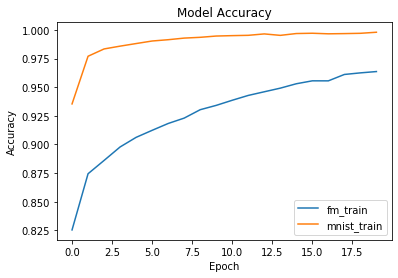

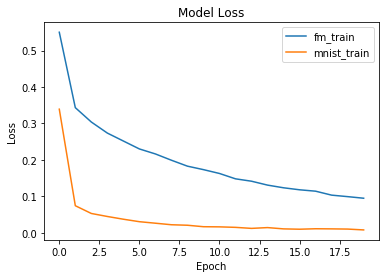

In [0]:
from matplotlib import pyplot as plt

plt.plot(fm_hist.history['acc'])
plt.plot(mnist_hist.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['fm_train', 'mnist_train'], loc='best')
plt.show()

plt.plot(fm_hist.history['loss'])
plt.plot(mnist_hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['fm_train', 'mnist_train'], loc='best')
plt.show()





## Resources:
* https://colab.research.google.com/drive/1CVm50PGE4vhtB5I_a_yc4h5F-itKOVL9#scrollTo=qFBt-mvYsEhM

* https://github.com/udacity/CarND-LeNet-Lab/blob/master/LeNet-Lab-Solution.ipynb

* https://medium.com/@mgazar/lenet-5-in-9-lines-of-code-using-keras-ac99294c8086

* https://www.pyimagesearch.com/2016/08/01/lenet-convolutional-neural-network-in-python/